Manifold Learning:
https://www.overleaf.com/project/5eac0a8fc087300001aa3218

Available Gensim Embeddings https://github.com/RaRe-Technologies/gensim-data#datasets

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')


from gensim.models.word2vec import Word2Vec
import gensim.downloader as api
from tqdm import tqdm
import annoy
from annoy import AnnoyIndex
import random
import numpy as np
import pandas as pd
import seaborn as sns
import time
from sklearn.cluster import KMeans
from collections import defaultdict
from sklearn.manifold import spectral_embedding, MDS, SpectralEmbedding
from scipy.spatial.distance import squareform, pdist, cdist
from sklearn.decomposition import PCA
from umap import UMAP

import numpy as np
from numba import njit, jit
from numba import types
from numba.typed import Dict
from scipy.cluster.hierarchy import linkage
from matplotlib.colors import BASE_COLORS
from helpers import (
    mds, write_embedding_to_text_file, write_embedding_to_two_text_files, is_numeric, fit_laplacian_eigenmaps
)
import lumap

sns.reset_defaults()
sns.set_context(context='talk',font_scale=0.7)

%matplotlib inline



unable to import 'smart_open.gcs', disabling that module


In [2]:
from word_embedding_helpers import plot_reduced_embeddings, get_data
entity_ids, raw_embeddings, metric = get_data(num_embeddings=50000)


/usr/local/lib/python3.7/site-packages/numba/np/ufunc/parallel.py:355: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 11000. The TBB threading layer is disabled.
  warnings.warn(problem)


lumap fit in 53.18990898132324 seconds
Counter({'b': 19501, 'g': 261, 'r': 238})


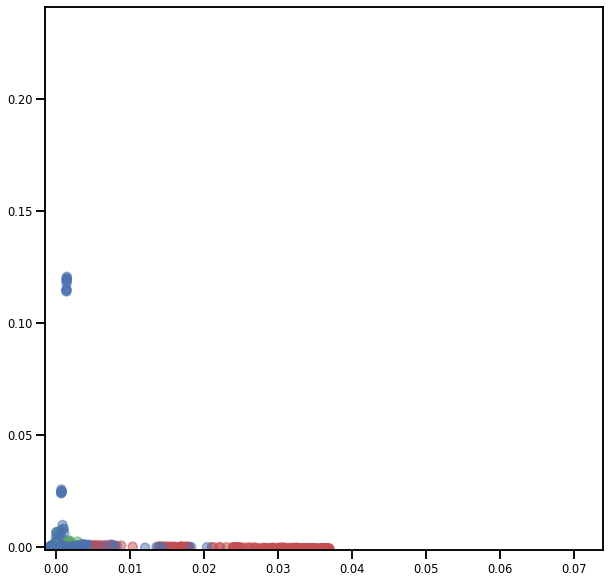

In [4]:
# Fit Laplacian UMAP
start = time.time()
lumap_embeddings = lumap.fit_lumap(X=raw_embeddings, n_neighbors=20, metric=metric, n_components=2)
print("lumap fit in {} seconds".format(time.time() - start))
plot_reduced_embeddings(entity_ids, lumap_embeddings, make_figure=True)
# mins = np.min(lumap_embeddings, axis=0)
# maxs = np.max(lumap_embeddings, axis=0)
# plt.xlim((-.25, .25))
# plt.ylim((-.1, .1))

write_embedding_to_two_text_files(
    entity_ids=entity_ids,
    embeddings=lumap_embeddings,
    entity_fname="/Users/dshiebler/Downloads/lumap_entities",
    embedding_fname="/Users/dshiebler/Downloads/lumap_embeddings")



In [70]:
start = time.time()
mlce_embeddings = lumap.fit_mlce(X=raw_embeddings, n_neighbors=15, metric=metric, n_components=2)
print("lumap fit in {} seconds".format(time.time() - start))
plot_reduced_embeddings(entity_ids, mlce_embeddings, make_figure=True)

building graph
Computing adjacency_matrix with 15 neighbors
(20000, 20000)
fitting simplicial_set_embedding



KeyboardInterrupt



In [ ]:
start = time.time()
print("fitting umap")
umap_embeddings = UMAP(n_components=2).fit_transform(raw_embeddings)
print("umap fit in {} seconds".format(time.time() - start))

start = time.time()
print("fitting pca")
pca_embeddings = PCA(n_components=2).fit_transform(raw_embeddings)
print("PCA fit in {} seconds".format(time.time() - start))

start = time.time()
print("fitting laplacian eigenmaps")
le_embeddings = fit_laplacian_eigenmaps(raw_embeddings, n_components=2)
print("LE fit in {} seconds".format(time.time() - start))

%matplotlib inline

plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.title("UMAP")
plot_reduced_embeddings(entity_ids, umap_embeddings, make_figure=False)

plt.subplot(1,3,2)
plt.title("PCA")
plot_reduced_embeddings(entity_ids, pca_embeddings, make_figure=False)

plt.subplot(1,3,3)
plt.title("Laplacian Eigenmaps")
plot_reduced_embeddings(entity_ids, le_embeddings, make_figure=False)

fitting umap
umap fit in 10.968751192092896 seconds
fitting pca
PCA fit in 0.03276681900024414 seconds
fitting laplacian eigenmaps
